In [18]:
import os
import openai
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

openai.api_key = os.environ['OPENAI_API_KEY']
np.set_printoptions(precision=3, suppress=True)


def get_embedding(text):
    """Compute embedding for a given text string."""
    result = openai.Embedding.create(input=text, model='text-embedding-ada-002')
    return np.array(result.data[0].embedding)


def center_embeddings(df):
    """Offset embeddings by it's center."""
    emb_center = df['embedding'].mean()
    df['embedding'] = df['embedding'].apply(lambda emb: emb - emb_center)


# might not use it after all
def softmax(x, temp=1.):
    """Compute row-wise softmax of a matrix x."""
    z = np.array(x)
    z -= z.max(axis=1, keepdims=True)
    z = np.exp(z / temp)
    z /= z.sum(axis=1, keepdims=True)
    return z


def visualize_embeddings():
    """Plot PCA projection of embeddings."""
    embs = np.array(users.embedding.tolist() + messages.embedding.tolist() + images.embedding.tolist())

    fig, ax = plt.subplots(figsize=(8,5))

    # compute embedding pca
    emb_pca = PCA(n_components=2).fit_transform(embs)
    users_pca, messages_pca, images_pca = np.split(emb_pca, [len(users),-len(images)])

    # plot users pca
    ax.scatter(users_pca[:,0], users_pca[:,1], s=100)
    for ind, pnt in enumerate(users_pca):
        ax.annotate(f'  p{ind}', pnt)
    # plot messages pca
    ax.scatter(messages_pca[:,0], messages_pca[:,1], s=100)
    for ind, pnt in enumerate(messages_pca):
        ax.annotate(f'  m{ind}', pnt)
    # plot images pca
    ax.scatter(images_pca[:,0], images_pca[:,1], s=100)
    for ind, pnt in enumerate(images_pca):
        ax.annotate(f'  i{ind}', pnt)

    # add legend
#     ax.scatter(-1, -1, s=150, color=sns.color_palette()[0], label='users')
#     ax.scatter(-1, -1, s=150, color=sns.color_palette()[1], label='messages')
#     ax.scatter(-1, -1, s=150, color=sns.color_palette()[2], label='images')
#     ax.legend()
#     ax.set_xlim(-.3, .35)
#     ax.set_ylim(-.25, .35)
    
    plt.tight_layout()
    plt.show()

## Laod and process data

In [23]:
messages = pd.read_csv('./data/messages.csv')
messages['embedding'] = messages['content'].apply(get_embedding)
messages

,content,embedding
0,Put on your favorite tunes and dance like nobo...,"[-0.016662903130054474, -0.02273133583366871, ..."
1,Take a break from your screen and hit the trai...,"[0.01571318507194519, -2.08936271519633e-05, 0..."
2,Unroll your yoga mat and take a deep breath. Y...,"[-0.0029764450155198574, -0.007221127860248089..."
3,Hop on your bike and feel the wind in your hai...,"[0.019620848819613457, -0.0022369406651705503,..."
4,Step away from your screen and take a walk out...,"[0.021906711161136627, 0.0026058636140078306, ..."
5,Dive into the pool and make a splash! Swimming...,"[0.002903272630646825, 0.018321897834539413, 0..."
6,Pick up some weights and feel the burn! Weight...,"[-0.020521124824881554, -0.016072403639554977,..."
7,Put on your running shoes and hit the pavement...,"[-0.015267414040863514, -0.005441178102046251,..."
8,Strap on your roller skates and roll into some...,"[-0.011343791149556637, -0.01502521988004446, ..."
9,Grab your clubs and hit the green! Golfing is ...,"[-0.005430407356470823, -0.012957642786204815,..."


In [24]:
images = pd.read_csv('./data/images.csv')
images['embedding'] = images['content'].apply(get_embedding)
images

,content,embedding
0,Young adult Indian man playing guitar and smil...,"[-0.00512389000505209, -0.011131316423416138, ..."
1,Adult white woman rolling dough in the kitchen...,"[-0.0008709206013008952, -0.02701425924897194,..."
2,Person with glasses filling out the newspaper ...,"[0.001948240795172751, 0.004021326545625925, 0..."
3,Senior hispanic man playing a game of cards in...,"[-0.018126731738448143, 0.0022897094022482634,..."
4,Young adult asian woman reading a book outside...,"[0.0006324822315946221, -0.00820168387144804, ..."
5,Person coloring in a coloring book with crayons.,"[-0.0006201823707669973, -0.0080994488671422, ..."
6,Senior white woman biking in the park and look...,"[0.005747919902205467, -0.02986261248588562, -..."
7,Person knitting at home next to a basket of yarn.,"[-0.023606378585100174, -0.010821701027452946,..."
8,Young adult African American man walking his d...,"[0.0031451412942260504, -0.015496259555220604,..."
9,Person shuffling a deck of playing cards.,"[-0.021624339744448662, -0.0013467257376760244..."


In [27]:
users = pd.read_csv('./data/users.csv')
users['embedding'] = users.apply(get_embedding_user, axis=1)
users

Gender                                   Male
Age                                     Young
Race                                    White
Likes                   Reading;Guitar;Biking
Dislikes    Knitting;Coloring Books;Solitaire
Name: 0, dtype: object
Young White Male
Reading Guitar Biking 
Knitting Coloring Books Solitaire 


Gender                            Female
Age                                Adult
Race                               Asian
Likes        Gardening;Baking;Meditating
Dislikes    Weightlifting;Walking;Biking
Name: 1, dtype: object
Adult Asian Female
Gardening Baking Meditating 
Weightlifting Walking Biking 


Gender                                               Male
Age                                                Senior
Race                                                Black
Likes                          Reading;Gardening;Knitting
Dislikes    Watercolor Painting;Jigsaw Puzzles;Crosswords
Name: 2, dtype: object
Senior Black Male
Reading Gardening Knitting 
Wat

,Gender,Age,Race,Likes,Dislikes,embedding
0,Male,Young,White,Reading;Guitar;Biking,Knitting;Coloring Books;Solitaire,"[-0.01633966084336862, -0.017739212285960093, ..."
1,Female,Adult,Asian,Gardening;Baking;Meditating,Weightlifting;Walking;Biking,"[-0.004074489744380115, -0.0011082756216637788..."
2,Male,Senior,Black,Reading;Gardening;Knitting,Watercolor Painting;Jigsaw Puzzles;Crosswords,"[-0.0005531630013138051, -0.03202679473324679,..."
3,Female,Young,Hispanic,Baking;Guitar;Meditating,Knitting;Coloring Books;Solitaire,"[-0.03440128638176248, 0.025348056084476413, 0..."
4,Male,Adult,White,Reading;Gardening;Baking,Weightlifting;Walking;Biking,"[0.016842608200386164, -0.018178882572101433, ..."
5,Female,Senior,Asian,Guitar;Meditating;Knitting,Watercolor Painting;Jigsaw Puzzles;Crosswords,"[-0.012257377989590168, -0.01275910804979503, ..."
6,Male,Young,Black,Reading;Baking;Guitar,Knitting;Coloring Books;Solitaire,"[-0.018364553328137845, -0.014648078213213012,..."
7,Female,Adult,Hispanic,Gardening;Meditating;Knitting,Weightlifting;Walking;Biking,"[-0.018721730588003995, 0.021224128198809922, ..."
8,Male,Senior,White,Reading;Gardening;Baking,Watercolor Painting;Jigsaw Puzzles;Crosswords,"[0.0109169059433043, -0.023404742422280835, -0..."
9,Female,Young,Asian,Guitar;Meditating;Knitting,Knitting;Coloring Books;Solitaire,"[-0.032979796628933404, 0.005867579602636396, ..."


In [26]:
def get_embedding_user(user):
    """Compute user embeddings accounting for likes and dislikes"""
    print(user)
    demo = f'{user.Age} {user.Race} {user.Gender}'
    print(demo)
    emb = get_embedding(demo)

    # positively adjust embedding for likes
    for like in user.Likes.split(';'):
        print(like, end=' ')
        emb += .2 * get_embedding(like)
    
    print()
    # negatively adjust embedding for dislikes
    for dislike in user.Dislikes.split(';'):
        print(dislike, end=' ')
        emb -= .2 * get_embedding(dislike)
    
    print('\n\n')
    return emb

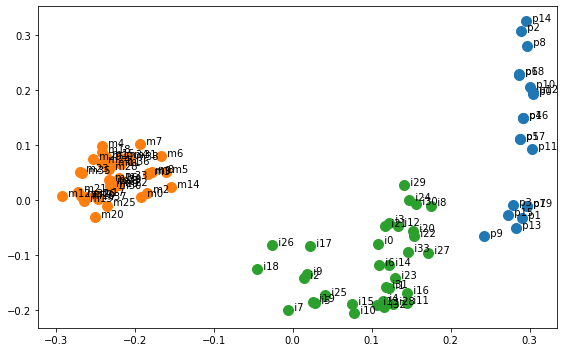

In [28]:
visualize_embeddings()

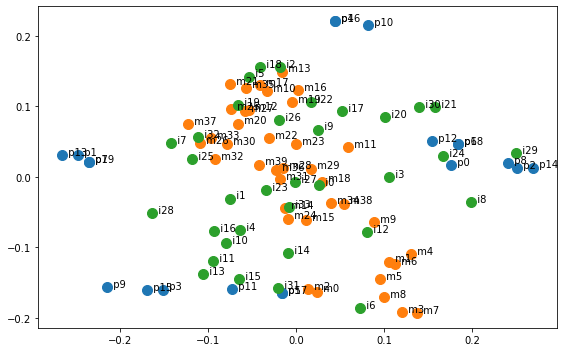

In [29]:
for df in [messages, images, users]:
    center_embeddings(df)
visualize_embeddings()

### Compute recommendations

In [81]:
def get_prefs(pref='norm', temp=.1, k=5):
    """Compute (user,message,image) proximity and return top k recommendations."""
    num_messages = len(messages)
    num_images = len(images)

    # compute preferences
    user_prefs = []
    for u, user_emb in enumerate(users.embedding):
        prefs = np.zeros((num_messages, num_images))
        for i, message_emb in enumerate(messages.embedding):
            for j, image_emb in enumerate(images.embedding):

                if pref == 'norm':
                    prefs[i][j] = -np.linalg.norm(user_emb - message_emb)\
                                - np.linalg.norm(user_emb - image_emb)\
                                - 2*np.linalg.norm(message_emb - image_emb)
                elif pref == 'cos':
                    prefs[i][j] = cossim(user_emb, message_emb)\
                                + cossim(user_emb, image_emb)\
                                + 2*cossim(message_emb, image_emb)
                elif pref == 'dot':
                    prefs[i][j] = np.dot(user_emb, message_emb)\
                                + np.dot(user_emb, image_emb)\
                                + 2*np.dot(message_emb, image_emb)
                elif pref == 'ans':
                    prefs[i][j] = anssim(user_emb, message_emb)\
                                + anssim(user_emb, image_emb)\
                                + anssim(message_emb, image_emb)

        # normalize preferences
        probs = softmax(prefs.reshape(1,-1), temp=temp).reshape(num_messages, num_images)
        user_prefs.append(probs)

        # show k best recommendations for each person
        print(f"Demographics: {' '.join(users.iloc[0].values[[1,2,0]])}")
        print(f"Likes: {', '.join(users.iloc[0].values[3].split(';'))}")
        print(f"Dislikes: {', '.join(users.iloc[0].values[4].split(';'))}\n")
        for ii, jj in zip(*np.unravel_index(np.argsort(probs, axis=None)[-1:-k-1:-1], probs.shape)):
            print(f'#{jj}/#{ii} ({100*probs[ii][jj]:2.0f}%): '\
                  + f'{images.loc[jj].content}\n{messages.loc[ii].content}\n')
        print('\n================================================\n')

    return user_prefs


def cossim(emb1, emb2):
    """Compute cosine similarity between two embeddings"""
    return np.dot(emb1, emb2) / (np.linalg.norm(emb1) * np.linalg.norm(emb2))


def anssim(emb1, emb2):
    """Compute AnS similarity between two embeddings"""
    cos = cossim(emb1, emb2) / 2
    euc = np.linalg.norm(emb1 - emb2) / np.sqrt(len(emb1))
    dist = (cos/2 + cos*euc + euc/2) / 2
    return dist


In [83]:
prefs = get_prefs(pref='dot', temp=.01)

Demographics: Young White Male
Likes: Reading, Guitar, Biking
Dislikes: Knitting, Coloring Books, Solitaire

#6/#3 (60%): Senior white woman biking in the park and looking towards the sky.
Hop on your bike and feel the wind in your hair! Biking is a fun and eco-friendly way to explore your surroundings, get some exercise, and enjoy the outdoors. Don't forget your helmet!

#2/#13 (17%): Person with glasses filling out the newspaper crossword puzzle.
Put your phone down and pick up a pen! Crosswords are a great way to exercise your brain and improve your vocabulary. Challenge yourself to complete one today!

#21/#11 (17%): Adult white man reading a book while sitting in the sea.
Take a break from your screen and dive into a good book. Reading can transport you to new worlds and expand your knowledge. Who knows what you might discover?

#21/#5 ( 2%): Adult white man reading a book while sitting in the sea.
Dive into the pool and make a splash! Swimming is a great way to cool off, get a fu